In [ ]:
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с 
# помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, 
# при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, 
# learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

%matplotlib inline

In [145]:
boston=load_boston()


In [146]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

y.mean()


22.532806324110677

In [147]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [148]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [149]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=42)

In [150]:
X_train.shape

(404, 13)

In [151]:
X_test.shape

(102, 13)

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler=StandardScaler(with_mean=False)

In [154]:
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.407163,0.500320,1.595255,0.278089,4.733670,8.913534,2.451925,1.789072,1.090610,2.434415,8.229471,3.895748,1.754167
std,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240
min,0.001022,0.000000,0.107463,0.000000,3.274959,5.451801,0.103719,0.530681,0.116563,1.126731,5.660528,0.003499,0.243608
25%,0.009187,0.000000,0.744981,0.000000,3.844887,8.313185,1.629098,0.980874,0.466250,1.681058,7.547370,4.105627,0.953662
50%,0.029489,0.000000,1.243088,0.000000,4.576437,8.764091,2.778945,1.491952,0.582813,1.988349,8.400942,4.278749,1.538391
75%,0.361342,0.864909,2.628491,0.000000,5.367531,9.366358,3.349397,2.537270,1.398751,4.012849,9.074814,4.327408,2.305474
max,10.037852,4.324547,4.028417,3.874063,7.409064,12.391098,3.576505,5.696971,2.797502,4.283988,9.883461,4.339928,5.346701


In [155]:
from sklearn.manifold import TSNE

In [156]:
tsne=TSNE( n_components=2, learning_rate=250, random_state=42)

X_train_tsne=tsne.fit_transform(X_train_scaled)

In [157]:
X_train_tsne.shape

(404, 2)

In [158]:
X_train_tsne[:5,:]

array([[ 29.76415  ,  20.98737  ],
       [ -4.2474775, -10.504842 ],
       [-18.814266 , -11.17595  ],
       [ 22.297651 ,  30.36269  ],
       [  1.7385299,  -9.13341  ]], dtype=float32)

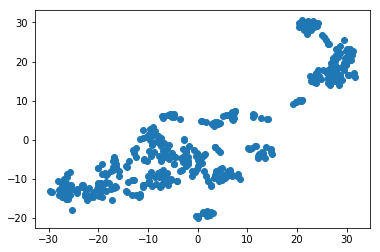

In [159]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

In [160]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и 
# раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.

In [161]:
from sklearn.cluster import KMeans

In [162]:
model = KMeans(n_clusters=3,  max_iter=100, random_state=100)

In [163]:
clusters=model.fit_predict(X_train_scaled)
clusters.shape

(404,)

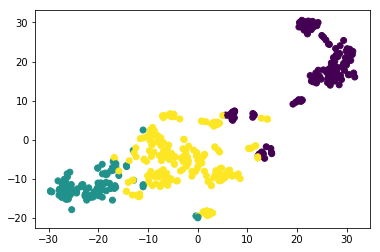

In [164]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=clusters)


In [165]:
print('Average price of buildings is',y_train.mean())
print('Average Crime rate is',X_train["CRIM"].mean())

Average price of buildings is 22.796534653465343
Average Crime rate is 3.609124628712873


In [166]:
print('Average price of buildings in Cluster 0 is',y_train[clusters==0].mean())
print('Average Crime rate in Cluster 0 is',X_train.loc[clusters==0, "CRIM"].mean())

Average price of buildings in Cluster 0 is 16.165354330708663
Average Crime rate in Cluster 0 is 10.797028425196853


In [167]:
print('Average price of buildings in Cluster 1 is',y_train[clusters==1].mean())
print('Average Crime rate in Cluster 1 is',X_train.loc[clusters==1, "CRIM"].mean())

Average price of buildings in Cluster 1 is 27.78837209302326
Average Crime rate in Cluster 1 is 0.07356558139534886


In [168]:
print('Average price of buildings in Cluster 1 is',y_train[clusters==2].mean())
print('Average Crime rate in Cluster 1 is',X_train.loc[clusters==2, "CRIM"].mean())

Average price of buildings in Cluster 1 is 24.958115183246072
Average Crime rate in Cluster 1 is 0.42166020942408367


In [169]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. 
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [170]:
clusters_test = model.predict(X_test_scaled)
clusters_test

array([2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2])

In [186]:
print('Average price of buildings of test dataset is',y_test.mean())
print('Average Crime rate of test dataset is',X_test["CRIM"].mean())

Average price of buildings of test dataset is 21.488235294117644
Average Crime rate of test dataset is 3.630946764705883


In [188]:
print('Average price of buildings in Cluster 0 of test dataset is',y_test[clusters_test==0].mean())
print('Average Crime rate in Cluster 0 of test dataset is',X_test.loc[clusters_test==0, "CRIM"].mean())

Average price of buildings in Cluster 0 of test dataset is 16.43714285714286
Average Crime rate in Cluster 0 of test dataset is 10.165531142857143


In [189]:
print('Average price of buildings in Cluster 1 of test dataset is',y_test[clusters_test==1].mean())
print('Average Crime rate in Cluster 1 of test dataset is',X_test.loc[clusters_test==1, "CRIM"].mean())

Average price of buildings in Cluster 1 of test dataset is 31.35
Average Crime rate in Cluster 1 of test dataset is 0.062060000000000004


In [190]:
print('Average price of buildings in Cluster 2 of test dataset is',y_test[clusters_test==2].mean())
print('Average Crime rate in Cluster 2 of test dataset is',X_test.loc[clusters_test==2, "CRIM"].mean())

Average price of buildings in Cluster 2 of test dataset is 21.860784313725492
Average Crime rate in Cluster 2 of test dataset is 0.26607882352941176


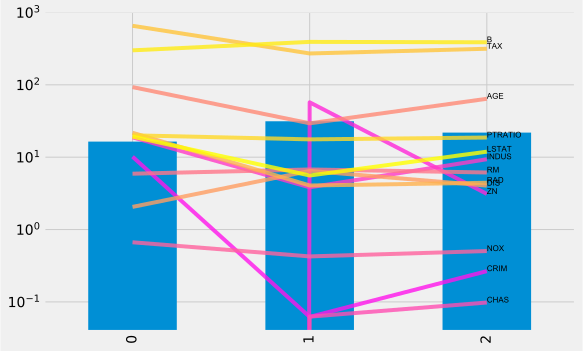

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8.5, 5.5)

plt.style.use('fivethirtyeight')

label_font = {
    "fontsize": 8,
    "family": "arial",
}


feature_mean_by_class=[]
clr=0
for feature in X_test.columns:
    for cluster in range (3):
        feature_mean_by_class.append(X_test.loc[clusters_test==cluster, feature].mean())
    clr+=1/13
    plt.plot([0,1,2],feature_mean_by_class, color = (1, clr, 1-clr, 0.8))
    plt.text(cluster, X_test.loc[clusters_test==cluster, feature].mean(), feature, fontdict=label_font)
    feature_mean_by_class=[]

avr_prices=pd.Series([y_test[clusters_test==0].mean(), y_test[clusters_test==1].mean(),y_test[clusters_test==2].mean()],index=[0,1,2])    
avr_prices.plot(kind="bar", logy=True)


plt.show()
                                      



KeyError: 'DESCR'